## 1. Read images/files and labeling

## 2. Data Augmentation


In [19]:
import numpy as np
import pandas as pd
import cv2 as cv

from matplotlib.image import imread
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

### Read data

In [20]:
os.getcwd() + os.sep + "data" + os.sep

'z:\\Data_Science\\TheBridge\\Content\\Contenido_Curso\\data_science_apr_2021\\week12_DL\\day3_DL_utils\\read_images_data_augmentation\\data\\'

In [21]:
data_path = os.getcwd() + os.sep + "data" + os.sep
only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]
images_no_mask = {}
images_mask_wb = {}
images_mask_color = {}
df_dict = []
for image_name in only_image_names:
    if ".png" in image_name:
        image_fullpath = data_path + image_name
        image_cv = cv.imread(image_fullpath, 0) # con 0 se lee en blanco y negro. color => cv.imread(image_fullpath)
        image_cv = cv.resize(image_cv, (211, 211))
        #print(image_cv.shape)
        if "msk" in image_name:
            df_dict.append({"Image":image_cv, "Label":1, "Fullpath":image_fullpath })
            images_mask_wb[image_fullpath] = 1
        elif "preview" in image_name:
            df_dict.append({"Image":image_cv, "Label":2, "Fullpath":image_fullpath})
            images_mask_color[image_fullpath] = 2
        else:
            df_dict.append({"Image":image_cv, "Label":0, "Fullpath":image_fullpath})
            images_no_mask[image_fullpath] = 0
        

df = pd.DataFrame(df_dict)
df.head()

,Image,Label,Fullpath
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,z:\Data_Science\TheBridge\Content\Contenido_Cu...
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,z:\Data_Science\TheBridge\Content\Contenido_Cu...
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2,z:\Data_Science\TheBridge\Content\Contenido_Cu...
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,z:\Data_Science\TheBridge\Content\Contenido_Cu...
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,z:\Data_Science\TheBridge\Content\Contenido_Cu...


In [22]:
X = np.stack(np.array(df["Image"]))
y = np.array(df["Label"])
print(X.shape)
print(y.shape)

(24, 211, 211)
(24,)


In [23]:
X[0].shape

(211, 211)

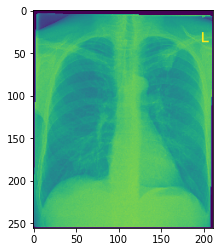

In [24]:
image = imread(df["Fullpath"][0])
plt.imshow(image)
plt.show()

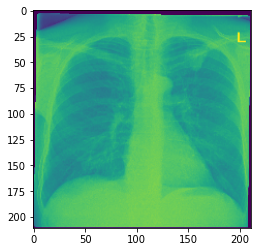

In [25]:
from PIL import Image


img = Image.fromarray(X[0])
plt.imshow(img)
plt.show()


In [26]:
X.shape

(24, 211, 211)

In [27]:
X_train = X.reshape(24,211,211,1)
X_train.shape

(24, 211, 211, 1)

## Data Augmentation

1. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


2. https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [45]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
for batch in datagen.flow(X_train, batch_size=1, save_to_dir='preview', save_format='png'):
    i += 1
    if i > 10:
        break